<a href="https://colab.research.google.com/github/Kim-Yeon-Jun/101_TF/blob/main/Ch3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 허깅페이스 트랜스포머 라이브러리 설치

In [ ]:
!pip install transformers

In [ ]:
# transformers 버전 확인
import transformers
print(transformers.__version__)

4.35.2


# Distilbert 모델

## 감성분석(sentiment-analysis)

In [ ]:
from transformers import pipeline
sentiment = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
sentiment.model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [ ]:
# sentiment 모델에 input(문장)을 넣고 감성분석 결과 출력
print(sentiment(["I like Olympic games as it's very exciting."]))
val1 = sentiment(["I like Olympic games as it's very exciting."])
print(val1[0]['label'])
print(sentiment(["I'm against to hold Olympic games in Tokyo in terms of preventing the covid19 to be spread "]))
val2 = sentiment(["I'm against to hold Olympic games in Tokyo in terms of preventing the covid19 to be spread "])
print(val2[0]['label'])

[{'label': 'POSITIVE', 'score': 0.9998026490211487}]
POSITIVE
[{'label': 'NEGATIVE', 'score': 0.9758422374725342}]
NEGATIVE


In [ ]:
def get_sen(x):
  return x[0]['label']

In [ ]:
def get_sen2(x):
  y = sentiment([f"{x}"])
  return y[0]['label']

In [ ]:
# val1 = sentiment(["I like Olympic games as it's very exciting."])
# val1 = get_sen(val1)
val1 = get_sen(sentiment(["I like Olympic games as it's very exciting."]))
print(val1)
val1 = get_sen2("I like Olympic games as it's very exciting.")
print(val1)

POSITIVE
POSITIVE


# 질의응답(questoin-answering)

In [ ]:
from transformers import pipeline
qa = pipeline("question-answering")
qa_pipeline = pipeline('question-answering', model='distilbert-base-cased-distilled-squad', tokenizer='distilbert-base-cased-distilled-squad')

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
hp_text = """Harry Potter is a series of seven fantasy novels written by British author J. K. Rowling.
The novels chronicle the lives of a young wizard, Harry Potter, and his friends Hermione Granger and Ron Weasley, all of whom are students at Hogwarts School of Witchcraft and Wizardry.
The main story arc concerns Harry's conflict with Lord Voldemort, a dark wizard who intends to become immortal, overthrow the wizard governing body known as the Ministry of Magic, and subjugate all wizards and Muggles (non-magical people).
The series was originally published in English by Bloomsbury in the United Kingdom and Scholastic Press in the United States.
A series of many genres, including fantasy, drama, coming-of-age fiction, and the British school story (which includes elements of mystery, thriller, adventure, horror, and romance),
the world of Harry Potter explores numerous themes and includes many cultural meanings and references. Major themes in the series include prejudice, corruption, madness, and death.
Since the release of the first novel, Harry Potter and the Philosopher's Stone, on 26 June 1997, the books have found immense popularity, positive reviews, and commercial success worldwide.
They have attracted a wide adult audience as well as younger readers, and are widely considered cornerstones of modern literature.
As of February 2023, the books have sold more than 600 million copies worldwide, making them the best-selling book series in history, and have been available in 85 languages.
The last four books consecutively set records as the fastest-selling books in history,
with the final instalment selling roughly 2.7 million copies in the United Kingdom and 8.3 million copies in the United States within twenty-four hours of its release.
The original seven books were adapted into an eight-part namesake film series by Warner Bros.
Pictures. In 2016, the total value of the Harry Potter franchise was estimated at $25 billion, making Harry Potter one of the highest-grossing media franchises of all time.
Harry Potter and the Cursed Child is a play based on a story co-written by Rowling
The success of the books and films has allowed the Harry Potter franchise to expand with numerous derivative works, a travelling exhibition that premiered in Chicago in 2009,
a studio tour in London that opened in 2012, a digital platform on which J. K. Rowling updates the series with new information and insight,
and a trilogy of spin-off films premiering in November 2016 with Fantastic Beasts and Where to Find Them, among many other developments.
Themed attractions, collectively known as The Wizarding World of Harry Potter, have been built at several Universal Destinations & Experiences amusement parks around the world. """

print(qa(question="What is Harry Potter", context=hp_text))

{'score': 0.03481076657772064, 'start': 1966, 'end': 2022, 'answer': 'one of the highest-grossing media franchises of all time'}


In [ ]:
qa.model

DistilBertForQuestionAnswering(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
      

## GPU 설정 확인

In [ ]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


## IMDB Dataset

In [ ]:
!pip install torchtext
import torchtext
print(torch.__version__)

2.1.0+cu121


In [ ]:
!pip install portalocker
import portalocker
print(portalocker.__version__)

2.8.2


In [ ]:
!pip install accelerate -U
import accelerate
print(accelerate.__version__)

0.26.1


In [ ]:
from torchtext.datasets import IMDB

train_iter = IMDB(split='train')
test_iter = IMDB(split='test')

In [ ]:
import random
random.seed(6) # 항상 같은 결과가 나오도록 임의의 seed 값을 설정

# 타입 변경
train_lists = list(train_iter)
test_lists = list(test_iter)
# 각 1000개씩 샘플링
train_lists_small = random.sample(train_lists, 1000)
test_lists_small = random.sample(test_lists, 1000)
# 각 리스트의 첫번째 원소 출력
print(train_lists_small[0])
print(test_lists_small[0])

(2, "I LOVED this movie! I am biased seeing as I am a huge Disney fan, but I really enjoyed myself. The action takes off running in the beginning of the film and just keeps going! This is a bit of a departure for Disney, they don't spend quite as much time on character development (my husband pointed this out)and there are no musical numbers. It is strictly action adventure. I thoroughly enjoyed it and recommend it to anyone who loves Disney, be they young or old.")
(1, 'This was an abysmal show. In short it was about this kid called Doug who guilt-tripped a lot. Seriously he could feel guilty over killing a fly then feeling guilty over feeling guilty for killing the fly and so forth. The animation was grating and unpleasant and the jokes cheap. <br /><br />It aired here in Sweden as a part of the "Disney time" show and i remember liking it some what but then i turned 13.<br /><br />I never got why some of the characters were green and purple too. What was up with that? <br /><br />Tru

## 구분

## label encoding

In [ ]:
train_texts = []
train_labels = []

for label, text in train_lists_small:
  train_labels.append(1 if label == 2 else 0)
  train_texts.append(text)

In [ ]:
test_texts = []
test_labels = []

for label, text in test_lists_small:
  test_labels.append(1 if label == 2 else 0)
  test_texts.append(text)

In [ ]:
print(type(train_texts))
print(type(train_labels))

print(train_texts[0])
print(train_labels[0])
print("==============")
print(test_texts[0])
print(test_labels[0])

<class 'list'>
<class 'list'>
I LOVED this movie! I am biased seeing as I am a huge Disney fan, but I really enjoyed myself. The action takes off running in the beginning of the film and just keeps going! This is a bit of a departure for Disney, they don't spend quite as much time on character development (my husband pointed this out)and there are no musical numbers. It is strictly action adventure. I thoroughly enjoyed it and recommend it to anyone who loves Disney, be they young or old.
1
This was an abysmal show. In short it was about this kid called Doug who guilt-tripped a lot. Seriously he could feel guilty over killing a fly then feeling guilty over feeling guilty for killing the fly and so forth. The animation was grating and unpleasant and the jokes cheap. <br /><br />It aired here in Sweden as a part of the "Disney time" show and i remember liking it some what but then i turned 13.<br /><br />I never got why some of the characters were green and purple too. What was up with t

## train test split

In [ ]:
from sklearn.model_selection import train_test_split
train_texts, val_texts, train_labels, val_labels = train_test_split(train_texts, train_labels, test_size=.2, random_state=3)
print(len(train_texts))
print(len(train_labels))
print(len(val_texts))
print(len(val_labels))

800
800
200
200


## 토크나이징(단어로 구분) & 인코딩(토큰->숫자)

In [ ]:
#distilbert-base-uncased 모델에서 토크나이저 불러오기
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [ ]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings = tokenizer(val_texts, truncation=True, padding=True)
test_encodings = tokenizer(test_texts, truncation=True, padding=True)

# 0번째 입력문(txt)의 5번째 토큰까지의 input_ids 출력
print(train_encodings["input_ids"][0][:5])

# 위의 내용을 디코딩하여 출력
print(tokenizer.decode(train_encodings["input_ids"][0][:5]))

[101, 4937, 11350, 2038, 2048]
[CLS] cat soup has two


## dataset class 생성

In [ ]:
import torch

class IMDbDataset(torch.utils.data.Dataset):

  def __init__(self, encodings, labels):
    self.encodings = encodings
    self.labels = labels

  def __getitem__(self, idx):
    item = {key : torch.tensor(val[idx]) for key, val in self.encodings.items()}

    item['labels'] = torch.tensor(self.labels[idx])
    return item

  def __len__(self):
    return len(self.labels)

train_dataset = IMDbDataset(train_encodings, train_labels)
val_dataset = IMDbDataset(val_encodings, val_labels)
test_dataset = IMDbDataset(test_encodings, test_labels)

In [ ]:
for i in train_dataset:
  print(i)
  break

{'input_ids': tensor([  101,  4937, 11350,  2038,  2048,  1000,  7592, 14433,  1000,  1011,
         2828, 18401,  2015, 28866,  2075,  2006,  1037, 13576,  4440,  2083,
         1996, 25115,  1010,  2073,  2505,  2064,  4148,  1010,  1998,  2515,
         1012,  2023,  2568,  1011,  4440,  4691,  4004,  2460,  3594,  2053,
        13764,  8649,  1010,  4942, 21532,  2773, 22163,  2612,  1012,  2045,
         2003,  2053,  2126,  1997,  7851,  2023, 17183, 14088,  9476,  3272,
         2000,  2425,  2017,  2000,  2156,  2009,  2005,  4426,  1012,  1998,
         2191,  2469,  2053,  2028,  2104,  2184,  2003,  1999,  1996,  2282,
         1012,  4487,  6491,  6633,  5677,  3672,  1998,  2064,  3490, 10264,
         2964,  1998, 18186,  1998,  9576,  2854,  1998,  5573,  2331,  1998,
         2655,  3560, 27770,  2005,  2500,  2024,  2691,  6991,  1012,  7481,
         1012,  3383,  1996,  2087, 13432,  3746,  2003,  2008,  1997,  2019,
        10777,  3605,  1997,  2300,  2008,  1996, 

## 사전학습 모델 불러오기

In [ ]:
from transformers import DistilBertForSequenceClassification
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")
model

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.weight', 'classifier.bias', 'pre_classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

## Train Arguments 설정(하이퍼파라미터 조정)

epoch, batchsize, activation function

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir = './results', # 출력 디렉토리 경로
    num_train_epochs=8, # 학습 에폭
    per_device_train_batch_size=16, # 학습 미니배치 사이즈
    per_device_eval_batch_size=64, # 평가 미니배치 사이즈
    warmup_steps=500, # 학습률 스케줄링용 스텝수
    weight_decay=0.01, # 가중치 감소 정도
    logging_dir='./logs', # 로그 디렉토리 경로
    logging_steps=10,
)

## GPU 전송

In [ ]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model = model.to(device)

cuda


## Trainer 클래스 사전학습

In [ ]:
# fine tuning 이전에 3개의 입력 문장 극성 판별

# tokenizing
input_tokens = tokenizer(["I feel fantastic",
                           "My life is going something wrong",
                           "I habe note figured out what the chosen title has to do with the movie"],
                          truncation=True,
                          padding=True)

# 입력 문장 토크나이징 결과(input_tokens)에 담긴 input_ids를 모델에 투입
# 모델 출력 결과를 GPU로 전송하고 그 값은 변수 outputs에 저장
outputs = model(torch.tensor(input_tokens['input_ids']).to(device))

# 레이블 딕셔너리 생성
label_dict = {0:'positive', 1:'negative'}

# outputs 변수에 담긴 logits 값을 행단위(입력 문장 단위)로 가장 큰 값의 위치(인덱스) 추출
# 결과값(인덱스)을 cpu로 넘기고 넘파이로 타입 변환 - 인덱스에 매칭되는 레이블 출력
print([label_dict[i] for i in torch.argmax(outputs['logits'], axis=1).cpu().numpy()])

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


['positive', 'positive', 'positive']


## Trainer.train()을 통한 파인튜닝

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model = model, # 사전학습 모델 인스턴스화
    args = training_args, # transformers.Arguments에 정의한 하이퍼파라미터
    train_dataset = train_dataset, # 학습 데이터셋
    eval_dataset = val_dataset # 평가 데이터셋
)

trainer.train()

Step,Training Loss
10,0.689800
20,0.693900
30,0.696500
40,0.691700
50,0.682400
60,0.679000
70,0.656000
80,0.626200
90,0.581100
100,0.504000


TrainOutput(global_step=400, training_loss=0.28343163918703795, metrics={'train_runtime': 287.66, 'train_samples_per_second': 22.248, 'train_steps_per_second': 1.391, 'total_flos': 847791351398400.0, 'train_loss': 0.28343163918703795, 'epoch': 8.0})

In [ ]:
input_tokens = tokenizer(["I feel fantastic",
                           "My life is going something wrong",
                           "I habe note figured out what the chosen title has to do with the movie"],
                          truncation=True,
                          padding=True)

outputs = model(torch.tensor(input_tokens['input_ids']).to(device))

label_dict = {0:'positive', 1:'negative'}

print([label_dict[i] for i in torch.argmax(outputs['logits'], axis=1).cpu().numpy()])

['negative', 'positive', 'positive']


# 파이토치 사전학습

1. 사전학습 모델 및 토크나이저 불러오기

2. DataLoader 인스턴스화

3. 최적화 함수 정의

4. 모델을 학습 모드로 전환

5. 에포크 횟수만큼 루프 반복

6. 최적화 함수의 gradient 초기화

7. 모델을 사용한 추론

8. 손실 계산

9. 오차역전파(back propagation / backward)
    optimizer.zero_grad()

    loss.backward()
10. 가중치 업데이트

    optimizer.step()

In [ ]:
# 함수 생성
def test_inference(model, tokenizer):
  input_tokens = tokenizer(["I fell fantastic","My life is going something wrong","I have not figured out what the chosen title has to do with the movie"],truncation=True, padding=True)
  outputs = model(torch.tensor(input_tokens['input_ids']).to(device))
  label_dict = {0:'positive',1:'negative'}
  return [label_dict[i] for i in torch.argmax(outputs['logits'], axis=1).cpu().numpy()]

In [ ]:
from torch.utils.data import DataLoader
from transformers import DistilBertForSequenceClassification, AdamW
from transformers import DistilBertTokenizerFast

# 1 사전학습 모델 및 토크나이저 불러오기
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')
model.to(device)

# 파인튜닝 이전 모델을 사용하여 test_inference 함수 실행
print(test_inference(model, tokenizer))

# 2 DataLoader 인스턴스화
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# 3 최적화 함수 정의
optim = AdamW(model.parameters(), lr=5e-5)

# 4 모델을 학습 모드로 전환 (dropout, batchnorm에 영향을 미침)
model.train()

losses = []

# 5 epoch 반복
for epoch in range(8):
  print(f'epoch:{epoch}')
  for batch in train_loader:
    # 최적화 함수 기울기 초기화
    optim.zero_grad()

    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    labels = batch['labels'].to(device)

    # 7 모델을 사용한 추론
    outputs = model(input_ids, attention_mask = attention_mask,labels=labels)
    # print(outputs[i] for i in range(len(outputs)))
    # 8 손실 계산
    loss = outputs[0]
    losses.append(loss)

    # 9 오차역전파
    loss.backward()

    # 10 가중치 업데이트
    optim.step()

# 모델을 평가 모드로 변환
model.eval()

# 평가 모드로 test_inference 함수 실행
print(test_inference(model, tokenizer))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.weight', 'classifier.bias', 'pre_classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


['positive', 'positive', 'negative']
epoch:0
epoch:1
epoch:2
epoch:3
epoch:4
epoch:5
epoch:6
epoch:7
['positive', 'positive', 'positive']


In [ ]:
print(losses)
type(losses)

[tensor(0.7177, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.6797, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.6149, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.6673, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.7258, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.7932, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.7337, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.7783, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.6852, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.6846, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.6891, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.7450, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.6752, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.6788, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.7010, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.6732, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.6723, device='

list

In [ ]:
# 파이토치에서 item()은 텐서의 값을 파이썬 숫자로 추출하여 CPU로 전달
new_losses = [i.item() for i in losses]

new_losses[:5]

[0.7176738977432251,
 0.6797053217887878,
 0.6148927807807922,
 0.6673257946968079,
 0.7258382439613342]

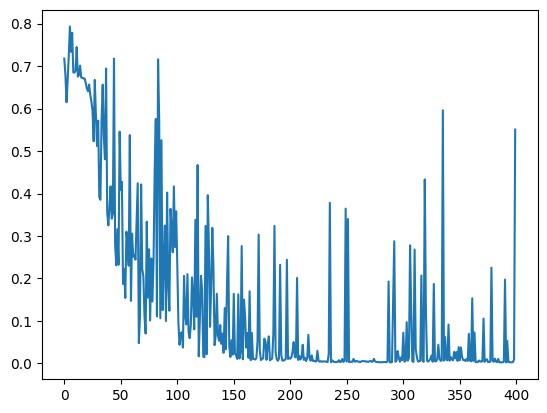

In [ ]:
import matplotlib.pyplot as plt
plt.plot(new_losses)
plt.show()

## 정확도

In [ ]:
model.eval()
l = []

for test_text in test_texts:
  # 토크나이징을 통한 인코딩
  input_tokens = tokenizer([test_text], truncation=True, padding=True)
  # 모델을 사용한 추론
  outputs = model(torch.tensor(input_tokens['input_ids']).to(device))

  # 입력 문자 단위로 가장 큰 logits 값의 인덱스 출력 후 item()으로 결과물 텐서의 값 추출 후 cpu로 전송
  l.append(torch.argmax(outputs['logits'], axis=1).item())

correct_cnt = 0

# zip()으로 쌍으로 묶음
for pred, ans in zip(l, test_labels):
  if pred == ans:
    correct_cnt += 1

print(correct_cnt / len(test_labels))

0.878


## 재현율, 정밀도, F1값

In [ ]:
tp = 0 # True Positive
tn = 0 # False Positive
fp = 0 # True Negative
fn = 0 # False Negative

for pred, ans in zip(l, test_labels):
  # tp, tn 계산
  if pred == ans:
    if pred == 1:
      tp += 1
    else:
      tn += 1

  # fn 계산
  elif pred == 0:
    fn += 1
  #fp 계산
  elif pred == 1:
    fp += 1

In [ ]:
# 재현율
recall = tp / (tp + fn)
print(recall)

# 정밀도
precision = tp / (tp + fp)
print(precision)

# F1값 (모델의 정밀도, 재현율을 종합한 성능)
(2 * precision * recall) / (precision + recall)

0.8434237995824635
0.8957871396895787


0.8688172043010752

## 분류 리포트

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, l))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89       521
           1       0.90      0.84      0.87       479

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000

